In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.constants as con
from scipy.integrate import odeint

In [2]:
import os
os.chdir('/Users/samgabe/Library/CloudStorage/OneDrive-TheUniversityofNottingham/University/Fourth year/Project/Term 2/')

## Define variables and functions
Constant terms are defined, then the non-constant $H_0$ and $\bar{t}_{rec}$ terms. The $\bar{t}_{rec}$ function also takes the clumping factor as an argument as this isn't constant.

In [3]:
sqrt = np.sqrt
G = con.G

# 1 MPc in metres
MPc = 3.0857E+22

# Define constants. Some are taken from the simulations
ndot_ion = 3E+50 / MPc**3
mass_H   = 1.67262192E-27
clump_H = 3
Xh = 0.76
Yhe = 1 - Xh
temp = 1E4
H0 = 67.5 * 1000 / MPc

Ωb = 0.0482
ΩL = 0.692
ΩM = 0.308

# Calculate alpha
a = 7.982e-11; b = 0.7480; T0 = 3.148e+00; T1 = 7.036e+05

# Divide symbol at the start instead of putting **-1 at the end
alpha = a / (sqrt(temp/T0) * (1 + sqrt(temp/T0))**(1-b) * (1+sqrt(temp/T1))**(1+b))
alpha /= 1e6

# Average number density of hydrogen. (1+z)**3 removed because nion factor has (1+z)**3 factor as well
n_avg = (3 * (H0*H0) / (8 * np.pi * G)) * Ωb * Xh / mass_H

# Functions to work out non-constant values
def hubble(z): return H0 * sqrt(ΩM * (1+z)**3 + ΩL)
def trec(z, clump): return 1 / (clump * alpha * n_avg * (1 + Yhe / (4 * Xh)) * (1+z)**3)

## Functions to calculate dQ/dz and Q
The dQ/dz function is called by the odeint function, which passes in the arguments (zarr, clumparr). These arrays are used to find the clumping factor, which makes up the first two lines of the dQ/dz function.

The findQ function loads the clumping factor data from a txt and solves the differential equation using this data.

In [4]:
# Returns dQ/dz given Q and z
def dQdz(Q, z, zarr, clumparr):
    # Find clumping factor.
    clump_index = np.abs(zarr - z).argmin()                     # Find index of nearest value to z
    clump = clumparr[clump_index]
    
    return 1 / (hubble(z) * (1 + z)) * (Q / trec(z, clump) - ndot_ion / n_avg)

# MAIN FUNCTION to return an array of Q for a filename
def findQ(filename):
    data = np.loadtxt(filename)                                 # Load data from file
    zarr = np.flip(data[:,0]); clumparr = np.flip(data[:,1])    # Unpack data into z and clump

    Qarr = odeint(dQdz, 0, zarr, args=(zarr, clumparr))[:,0]    # Solve diff. equation
    return (Qarr, zarr)

## Q vs z plots, $\Delta = 100$

In [5]:
# Create data. Returns Q and z but z is always the same, so after we have z we only need [0] from func
stem = 'Data/Clumping Factor Data/'
Q_Λcdm, zarr = findQ(stem + 'planck1_20_1024 data txt/planck1201024 C z Dlim 100 for CR correct alpha _ FIXED.txt')
Q_cdm        = findQ(stem + 'planck1_20_1024_COLD data txts/planck1201024cold C z Dlim 100 for CR correct alpha.txt')[0]
Q_wdm1       = findQ(stem + 'planck1_20_1024_WDM1 data txts/planck1201024wdm1 C z Dlim 100 for CR correct alpha.txt')[0]
Q_wdm2       = findQ(stem + 'planck1_20_1024_WDM2 data txts/planck1201024wdm2 C z Dlim 100 for CR correct alpha.txt')[0]
Q_wdm3       = findQ(stem + 'planck1_20_1024_WDM3 data txts/planck1201024wdm3 C z Dlim 100 for CR correct alpha.txt')[0]
Q_wdm4       = findQ(stem + 'planck1_20_1024_WDM4 data txts/planck1201024wdm4 C z Dlim 100 for CR correct alpha.txt')[0]
Q_wdmt       = findQ(stem + 'planck1_20_1024_WARM_TAR data txts/planck1201024hot C z Dlim 100 for CR correct alpha.txt')[0]

# Find value with constant clumping factor
clumparr_c3 = np.ones_like(zarr) * 3.
Q_c3 = odeint(dQdz, 0, zarr, args=(zarr, clumparr_c3))[:,0]

plt.figure(figsize=(7, 5))

# Plots
plt.plot(zarr, Q_Λcdm, linewidth=1.0, label='ΛCDM')
plt.plot(zarr, Q_cdm , linewidth=1.0, label='CDM' )
plt.plot(zarr, Q_wdm1, linewidth=1.0, label='WDM1')
plt.plot(zarr, Q_wdm2, linewidth=1.0, label='WDM2')
plt.plot(zarr, Q_wdm3, linewidth=1.0, label='WDM3')
plt.plot(zarr, Q_wdm4, linewidth=1.0, label='WDM4')
plt.plot(zarr, Q_wdmt, linewidth=1.0, label='WARM_TAR')
plt.plot(zarr, Q_c3  , linewidth=1.0, label='C=3 (const)')

plt.xlim(np.min(zarr), np.max(zarr))
# plt.ylim(0., 1.)
plt.xlabel('$z$')
plt.ylabel('$Q$')
plt.legend()
plt.savefig('Graphs/Plotting Ionisation Graphs/Odeint Defined C', dpi=1000)
plt.show()

OSError: Data/Clumping Factor Data/planck1_20_1024 data txt/planck1201024 C z Dlim 100 for CR correct alpha _ FIXED.txt not found.

## Q vs z plots, ΛCDM, varying density limit

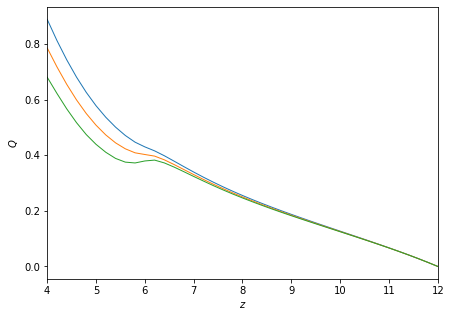

In [ ]:
# Create data
stem = 'Data/Clumping Factor Data/planck1_20_1024 data txt/planck1201024 C z Dlim {0} for CR correct alpha _ FIXED.txt'
Q_dlim50, zarr = findQ(stem.format('50'))
Q_dlim100      = findQ(stem.format('100'))[0]
Q_dlim200      = findQ(stem.format('200'))[0]

plt.figure(figsize=(7, 5))

# Plots
plt.plot(zarr, Q_dlim50 , linewidth=1.0, label='$\\Delta=50$' )
plt.plot(zarr, Q_dlim100, linewidth=1.0, label='$\\Delta=100$')
plt.plot(zarr, Q_dlim200, linewidth=1.0, label='$\\Delta=200$')

plt.xlim(np.min(zarr), np.max(zarr))
# plt.ylim(0., 1.)
plt.xlabel('$z$')
plt.ylabel('$Q$')
plt.savefig('Graphs/Ionisation/Varying Dlim for LambdaCDM.png', dpi=300)
plt.show()